In [1]:
#Importing dataset
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
#Fetch Dataset Images from Fodlers

In [5]:
count = 0 
dirs = os.listdir('Brain cancer images/')
for dir in dirs:
    files = list(os.listdir('Brain cancer images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

healthy Folder has 408 Images
tumor Folder has 391 Images
Images Folder has 799 Images


In [6]:
#Load Data Images into Arrays as Dataset

In [7]:
base_dir = 'Brain cancer images/'
img_size = 180
batch = 32

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 799 files belonging to 2 classes.
Using 640 files for training.
Found 799 files belonging to 2 classes.
Using 159 files for validation.


In [9]:
catergory_names = train_ds.class_names
catergory_names

['healthy', 'tumor']

In [10]:
import matplotlib.pyplot as plt

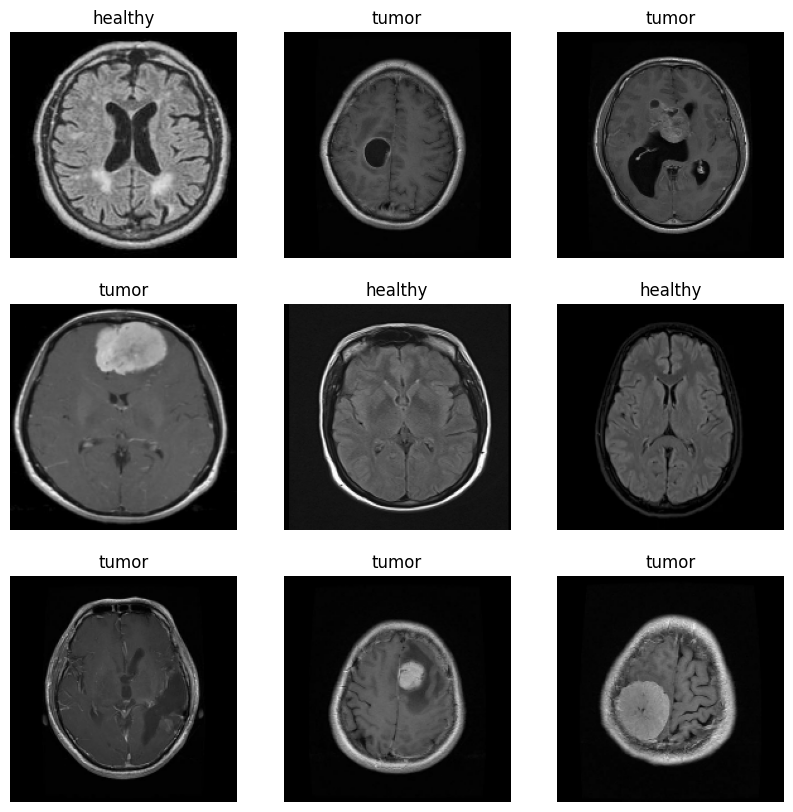

In [11]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(catergory_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [15]:
# Data Augmentation

In [17]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

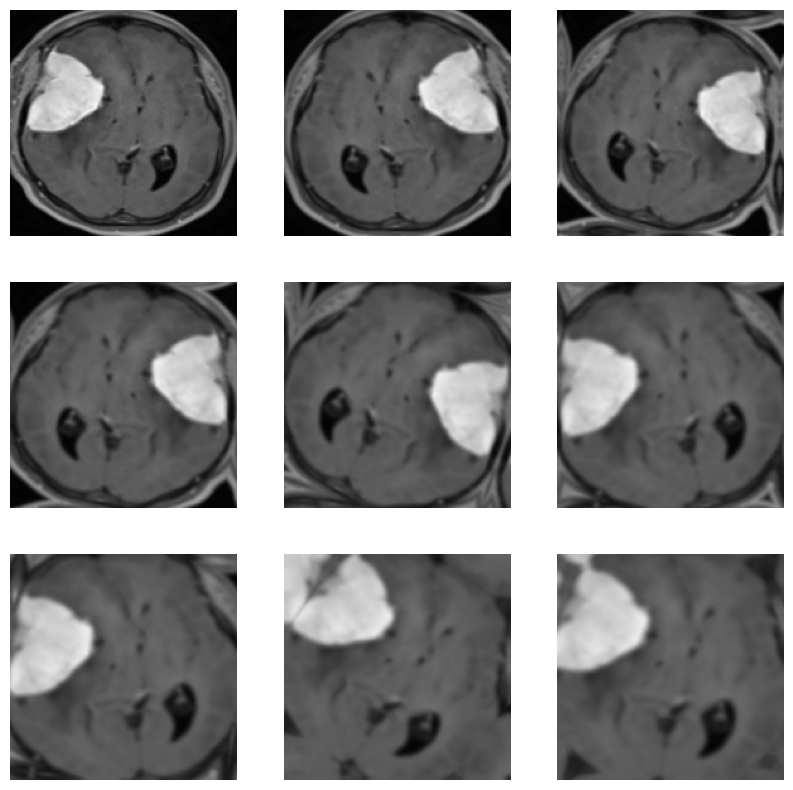

In [18]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [19]:
#MOdel Creation

In [20]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 609ms/step - accuracy: 0.6600 - loss: 0.6316 - val_accuracy: 0.7484 - val_loss: 0.5345
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 571ms/step - accuracy: 0.7914 - loss: 0.4754 - val_accuracy: 0.8553 - val_loss: 0.3859
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.8502 - loss: 0.3868 - val_accuracy: 0.8679 - val_loss: 0.3383
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 539ms/step - accuracy: 0.8743 - loss: 0.3345 - val_accuracy: 0.8679 - val_loss: 0.3281
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 536ms/step - accuracy: 0.9082 - loss: 0.2492 - val_accuracy: 0.8931 - val_loss: 0.2357
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 542ms/step - accuracy: 0.8865 - loss: 0.3240 - val_accuracy: 0.8868 - val_loss: 0.2374
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 561ms/step - accuracy: 0.8966 - loss: 0.2880 - val_accuracy: 0.8742 - val_loss: 0.2731
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 625ms/step - accuracy: 0.9115 - loss: 0.2201 - val_accu

In [84]:
import random

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    drugsToUse = ['omo', 'fr', 'yh', 'yoo']
    outcome = 'The image here belongs to ' + catergory_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100) + ' and you are advised to use ' + random.choice(drugsToUse) + ' drugs' 
    return outcome

In [85]:
classify_images('Brain cancer images/healthy/healthy (100).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The image here belongs to healthy with a score of 99.21367168426514 and you are advised to use fr drugs'

In [86]:
# import random

# ListOfItem = range(1,10)

# print(random.choice(ListOfItem))